In [6]:
#Importing Pandas library (pd)
import pandas as pd

#Uploading Dataframe (df)
df = pd.read_csv('https://raw.githubusercontent.com/pmalviyaa/schulich_data_science/main/sales_data.csv')

#View Dataframe
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [7]:
#Viewing Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [8]:
#Viewing Summary of all columns 
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


<Axes: xlabel='Price', ylabel='Count'>

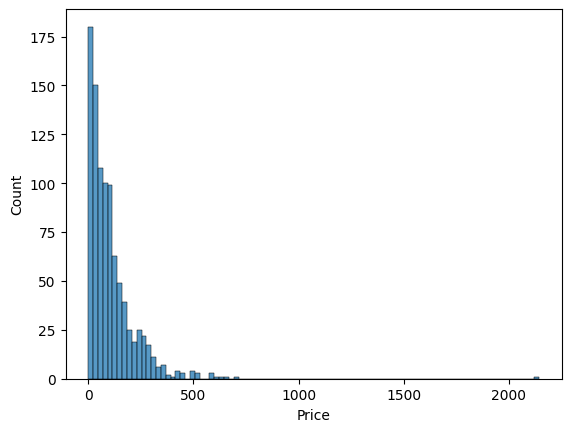

In [9]:
#Importing Packages
import seaborn as sns

#Viewing History plot for the column Price to identify the outlier 
sns.histplot(df['Price'])

In [10]:
#Filtering the data set and identifying the outlier
df[df['Price']> 2000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [11]:
# drop the outlier
df.drop(969, axis=0, inplace=True )

<Axes: xlabel='Price', ylabel='Count'>

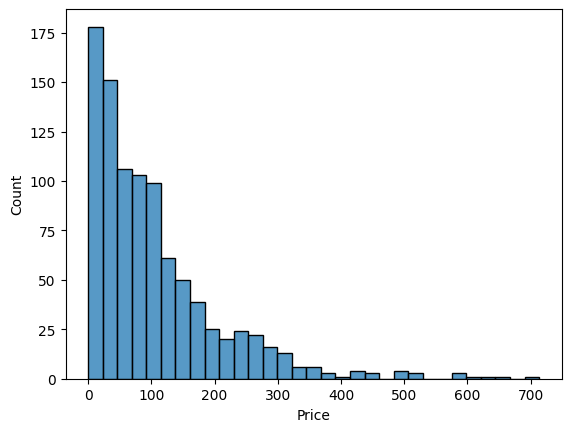

In [12]:
#Viewing History plot 
sns.histplot(df['Price'])

In [20]:
#Filling blank areas with mean in the column  Price
df['Price'] = df['Price'].fillna(df['Price'].mean())

<Axes: >

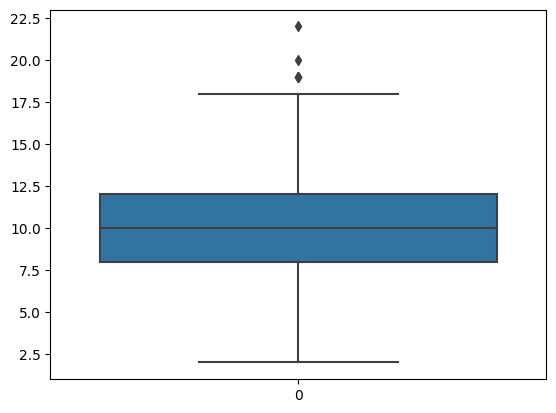

In [26]:
#Viewing Boxplot for the column Units Sold
sns.boxplot(df['Units Sold'])

In [31]:
#Filtering the data set and identifying the outlier
df[df['Units Sold']> 18]

,Product,Region,Price,Units Sold,Sale Date
221,Product_5,Region_5,50.360000,20.0,2022-08-10
232,Product_14,Region_3,104.270000,19.0,2022-08-21
719,Product_50,Region_4,86.730000,22.0,2023-12-21
912,Product_22,Region_8,107.598688,19.0,2024-07-01
962,Product_13,Region_7,0.610000,19.0,2024-08-20


In [34]:
#Dropping the outlier 
df.drop(df[df['Units Sold']> 18].index, axis=0, inplace=True )

<Axes: >

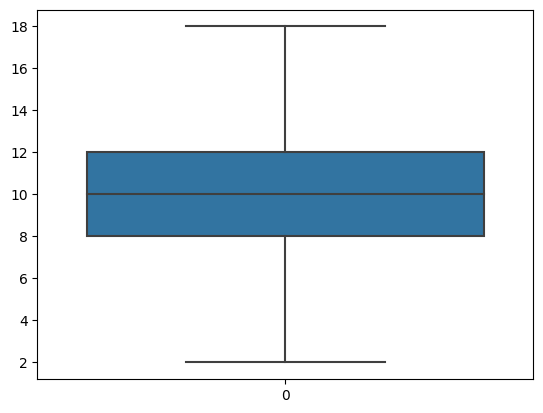

In [35]:
#Viewing Boxplot for the column Units Sold after dropping the outliers
sns.boxplot(df['Units Sold'])

In [36]:
#Filling blank areas with mean in the column Units Sold
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].mean())

In [ ]:
#Dropping duplicates from the df because of entry error
df.drop_duplicates(inplace=True)


In [39]:
# Replacing the missing data in the product and region columns
df['Product'] = df['Product'].fillna('Other')
df['Region'] = df['Region'].fillna('Other')

In [41]:
# Making Sure that data is clean as desired
df.describe(include='all')


,Product,Region,Price,Units Sold,Sale Date
count,1045,1045,1045.000000,1045.000000,1045
unique,51,11,NaN,NaN,995
top,Other,Region_9,NaN,NaN,2024-08-13
freq,103,109,NaN,NaN,2
mean,NaN,NaN,107.778999,9.996812,NaN
std,NaN,NaN,117.869411,2.940175,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.850000,8.000000,NaN
50%,NaN,NaN,88.450000,9.996812,NaN
75%,NaN,NaN,133.350000,12.000000,NaN


In [46]:
# Dropping Values that indicate Other in the columns Product and region
df.drop(df[df['Region'] == 'Other'].index, inplace = True)
df.drop(df[df['Product'] == 'Other'].index, inplace = True)
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,848,848,848.000000,848.000000,848
unique,50,10,NaN,NaN,805
top,Product_5,Region_9,NaN,NaN,2024-08-06
freq,27,101,NaN,NaN,2
mean,NaN,NaN,108.745524,10.024456,NaN
std,NaN,NaN,122.910865,2.992413,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,34.087500,8.000000,NaN
50%,NaN,NaN,88.450000,9.996812,NaN
75%,NaN,NaN,131.442500,12.000000,NaN


# Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?
 My data cleaning approach involved identifying the outliers,dropping the outliers, filling blank areas with mean for the columns price and units sold, dropping duplicates replacing the missing data in the product and region columns with other and dropping values that indicate other in the columns product and region.

In [13]:
import numpy as np

In [14]:
import math 
import scipy.stats

In [15]:
dftemp= df['Price']

In [16]:
def kurtosis(dftemp):
    n = len(dftemp)
    mean = sum(dftemp) / n
    variance = sum((x - mean) ** 2 for x in dftemp) / n
    std_dev = math.sqrt(variance)
    
    kurtosis = sum((x - mean) ** 4 for x in dftemp) / (n * std_dev ** 4) - 3
    return kurtosis

In [17]:
print("dftemp Distribution: ", kurtosis(dftemp))

dftemp Distribution:  nan


In [18]:
print("dftemp Distribution (scipy): ", scipy.stats.kurtosis(dftemp, fisher=True))

dftemp Distribution (scipy):  nan
